In [24]:
#Mini Project Notebook Team: Janasia Brokenburr and Natalie Beane
#Dataset: Obesity rates per US States in 2015
#Dataset sourced from: Catalog.gov website provided in instructions
#Description of data: obesity levels of each of the 50 US States in 2015
#Questions: 1. Which states rank in the top 5 for the highest levels of obesity, and what are their respective rates (%)?
# Question 2. What percentage of people with obesity live in Southern U.S. states compared to other regions (Northeast, Midwest, and West)?
# Question 3. How do the obesity rates of the five states with the highest rates compare to the five states with the lowest rates?


#CLEANING THE DATA: code generated by AI 
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('LakeCounty_Health_2397514566901885190 (1).csv')

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df_cleaned = df.dropna()

# Drop columns with missing values
df_cleaned = df.dropna(axis=1)

# print mean, median, mode and range of Obesity stats
mean_value = df['Obesity'].mean()
median_value = df['Obesity'].median()
mode_value = df['Obesity'].mode()[0]  # Takes the first mode if there are multiple modes
range_value = df['Obesity'].max() - df['Obesity'].min()

print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value)
print("Range:", range_value)

# drop unneccesary columns
df = df.drop(['Shape__Area', 'Shape__Length'], axis=1)
print (df)




OBJECTID         0
NAME             0
Obesity          0
Shape__Area      1
Shape__Length    1
dtype: int64
Mean: 29.28653846153846
Median: 29.8
Mode: 35.6
Range: 16.000000000000004
    OBJECTID                  NAME  Obesity
0          1                 Texas     32.4
1          2            California     24.2
2          3              Kentucky     34.6
3          4               Georgia     30.7
4          5             Wisconsin     30.7
5          6                Oregon     30.1
6          7              Virginia     29.2
7          8             Tennessee     33.8
8          9             Louisiana     36.2
9         10              New York     25.0
10        11              Michigan     31.2
11        12                 Idaho     28.6
12        13               Florida     26.8
13        14                Alaska     29.8
14        15               Montana     23.6
15        16             Minnesota     26.1
16        17              Nebraska     31.4
17        18            Wa

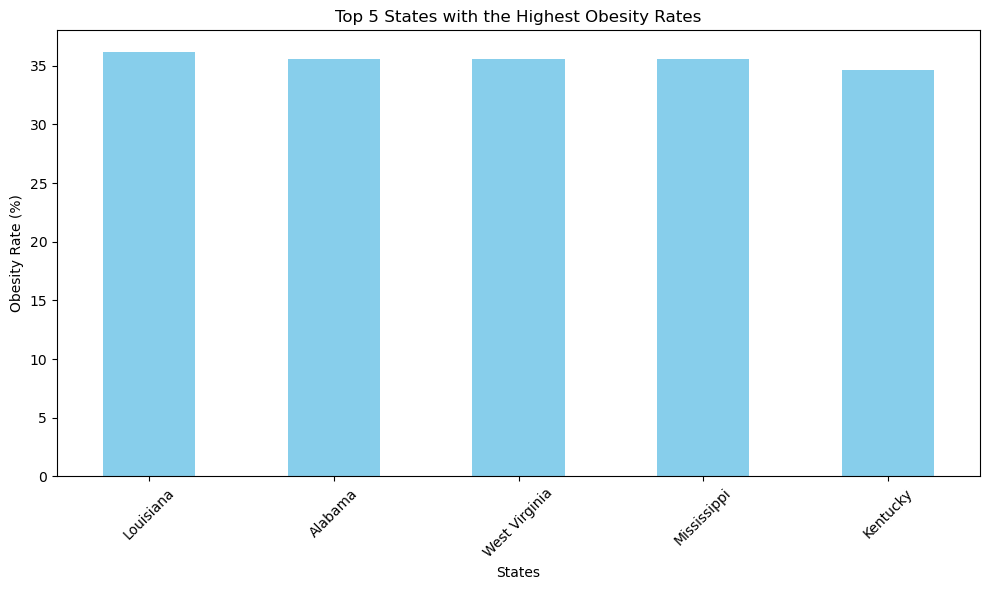

In [25]:
#QUESTION ANSWERED: Which states rank in the top 5 for the highest levels of obesity, and what are their respective rates (%)?, code generated by AI
# description: Create a bar graph where the x-axis represents the states and the y-axis represents the obesity rates (%). Each bar will depict one state’s obesity rate.
import pandas as pd
import matplotlib.pyplot as plt


obesity_data = df[['NAME', 'Obesity']]

# Drop rows with missing values in these columns (if any)
obesity_data = obesity_data.dropna(subset=['Obesity'])

# Convert obesity rate column to numeric (if not already)
obesity_data['Obesity'] = pd.to_numeric(obesity_data['Obesity'], errors='coerce')

# Group by state and calculate the mean obesity rate (if there are multiple entries per state)
obesity_by_state = obesity_data.groupby('NAME')['Obesity'].mean()

# Sort the states by obesity rate in descending order and get the top 5
top_5_states = obesity_by_state.sort_values(ascending=False).head(5)

# Plot the top 5 states in a bar graph
plt.figure(figsize=(10, 6))
top_5_states.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('States')
plt.ylabel('Obesity Rate (%)')
plt.title('Top 5 States with the Highest Obesity Rates')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


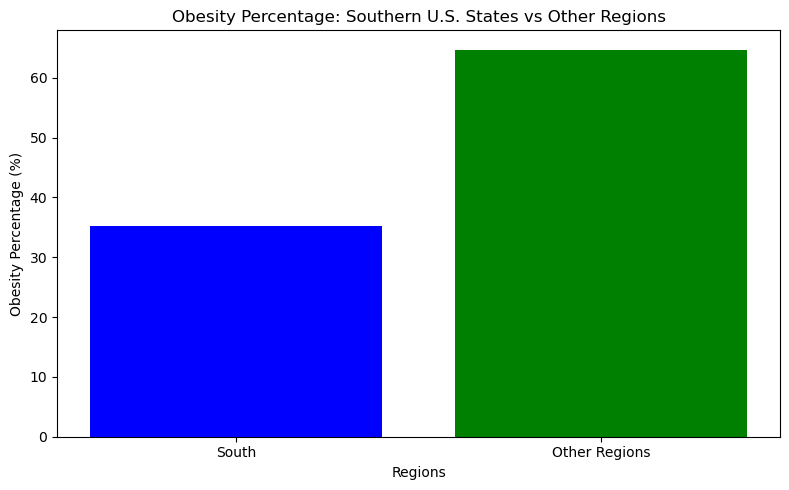

In [28]:
#QUESTION ANSWERED: What percentage of people with obesity live in Southern U.S. states compared to other regions (Northeast, Midwest, and West)?, code generated by AI
#description: Create a line graph with two bars representing the Southern U.S. states and other regions. The x-axis will show the regions, and the y-axis will represent the percentage of people with obesity.
import pandas as pd
import matplotlib.pyplot as plt

# Define the states by region (replace with actual column name)
south = ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina',
         'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Washington D.C.', 'West Virginia']
northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']
midwest = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio',
           'South Dakota', 'Wisconsin']
west = ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']

# Add a 'Region' column to classify the states by region
def get_region(state):
    if state in south:
        return 'South'
    elif state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in west:
        return 'West'
    else:
        return 'Unknown'

# Assuming df is your DataFrame with state and obesity rate columns (replace 'state_column' and 'obesity_rate_column')
df['Region'] = df['NAME'].apply(get_region)

# Calculate the total obesity rate for each region
obesity_by_region = df.groupby('Region')['Obesity'].sum()

# Calculate the percentage for South and Other regions (Northeast + Midwest + West)
south_obesity = obesity_by_region['South']
other_obesity = obesity_by_region[['Northeast', 'Midwest', 'West']].sum()

total_obesity = south_obesity + other_obesity
south_percentage = (south_obesity / total_obesity) * 100
other_percentage = (other_obesity / total_obesity) * 100

# Create a bar graph to display the percentages
regions = ['South', 'Other Regions']
percentages = [south_percentage, other_percentage]

plt.figure(figsize=(8, 5))
plt.bar(regions, percentages, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Regions')
plt.ylabel('Obesity Percentage (%)')
plt.title('Obesity Percentage: Southern U.S. States vs Other Regions')

# Show the plot
plt.tight_layout()
plt.show()


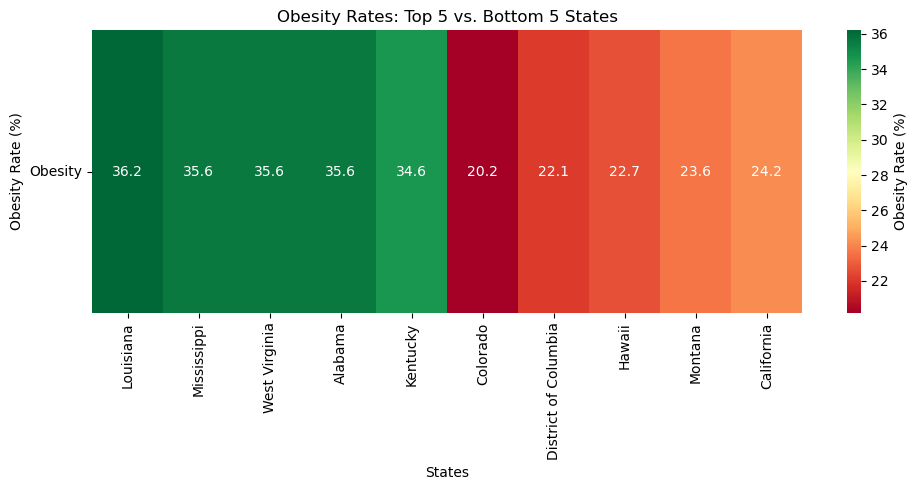

In [29]:
#Question Answered: How do the obesity rates of the five states with the highest rates compare to the five states with the lowest rates?, code generated with AI
#description: The heat map will be divided into two sections: one for the five states with the highest obesity rates and one for the five states with the lowest rates. For instance, a deep red might represent the highest obesity rates (e.g., above 35%), while lighter shades (e.g., yellow or green) represent lower rates (e.g., below 25%)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with state and obesity rate columns (replace 'state_column' and 'obesity_rate_column')
# Sort the DataFrame by obesity rate to get the top 5 and bottom 5
top_5_states = df.nlargest(5, 'Obesity')[['NAME', 'Obesity']]
bottom_5_states = df.nsmallest(5, 'Obesity')[['NAME', 'Obesity']]

# Combine the two DataFrames
comparison_df = pd.concat([top_5_states, bottom_5_states], ignore_index=True)

# Pivot the data for the heatmap
comparison_df.set_index('NAME', inplace=True)

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(comparison_df.T, cmap='RdYlGn', annot=True, fmt=".1f", cbar_kws={'label': 'Obesity Rate (%)'})

# Adjusting the labels and title
plt.title('Obesity Rates: Top 5 vs. Bottom 5 States')
plt.xlabel('States')
plt.ylabel('Obesity Rate (%)')
plt.yticks(rotation=0)  # Rotate y-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#Our interpretation of the AI analysis outputs: We put the analysis of the AI results with each code line above. We found the AI outputs to be really helpful for the most part. It gave general code that we were able to fix/tweak to our dataset.